<a href="https://colab.research.google.com/github/Sovit1056/Pytorch_practice/blob/main/02_PyTorch_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 02. Neural Network Classification with PyTorch

Classification is a problem of predicting wheather something is one thing or another( there can be multiple things as the option)

Book version: https://www.learnpytorch.io/02_pytorch_classification/

## 1. Make classification data and get it ready

In [1]:
import sklearn        #scikit-learn: It's very popular machine learning library where as pytorch is mainly focused in deep learning
from sklearn.datasets import make_circles # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html

| Use-case | Sklearn Functionality | Description / Purpose | Example |
|---|---|---|---|
| **1. Toy datasets** | `make_classification`, `make_regression`, `make_moons`, `make_circles` | Generate synthetic datasets for quick testing and visualisation of classification, regression, or clustering models without real data. Useful for understanding model behaviour, debugging architectures, and visual learning. | `from sklearn.datasets import make_classification; X, y = make_classification(n_samples=1000, n_features=10)` |
| **2. Data preprocessing - scaling** | `StandardScaler`, `MinMaxScaler`, `RobustScaler` | Normalize feature scales to improve model training convergence, prevent gradient explosion/vanishing, and ensure each feature contributes equally. StandardScaler standardizes to mean=0 and std=1; MinMaxScaler scales to [0,1]. | `from sklearn.preprocessing import StandardScaler; scaler = StandardScaler(); X_scaled = scaler.fit_transform(X)` |
| **3. Encoding categorical data** | `LabelEncoder`, `OneHotEncoder` | Converts categorical string labels into numerical labels (LabelEncoder) or one-hot encoded matrices (OneHotEncoder) for model compatibility. Essential before converting data to PyTorch tensors. | `from sklearn.preprocessing import LabelEncoder; le = LabelEncoder(); y_encoded = le.fit_transform(y)` |
| **4. Data splitting** | `train_test_split` | Splits data into training and testing sets efficiently with shuffling and stratification options. Prevents data leakage and ensures robust evaluation. | `from sklearn.model_selection import train_test_split; X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)` |
| **5. Cross-validation** | `KFold`, `StratifiedKFold`, `cross_val_score` | Performs k-fold cross-validation to assess model generalisation by training and validating on different data splits. StratifiedKFold maintains class balance per fold. | `from sklearn.model_selection import KFold; kf = KFold(n_splits=5)` |
| **6. Pipelines** | `Pipeline` | Chains preprocessing steps and models into a single object for clean, reproducible code. Mainly used in traditional ML but helps in preprocessing pipelines before PyTorch data loading. | `from sklearn.pipeline import Pipeline` |
| **7. Baseline models** | `LogisticRegression`, `RandomForestClassifier`, `LinearRegression` | Train quick baseline traditional ML models to benchmark performance before implementing complex PyTorch neural networks. Helps decide if deep learning is necessary. | `from sklearn.linear_model import LogisticRegression; model = LogisticRegression(); model.fit(X_train, y_train)` |
| **8. Performance metrics** | `accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `confusion_matrix`, `mean_squared_error`, `r2_score` | Evaluate classification or regression performance using robust, ready-made metrics for meaningful interpretation of PyTorch model predictions. | `from sklearn.metrics import accuracy_score; acc = accuracy_score(y_true, y_pred)` |
| **9. Model selection & hyperparameter tuning** | `GridSearchCV`, `RandomizedSearchCV` | Tune hyperparameters systematically (GridSearch) or randomly (RandomizedSearch) to find optimal model settings. Mainly for sklearn models but conceptually useful before deep learning training. | `from sklearn.model_selection import GridSearchCV` |
| **10. Polynomial features** | `PolynomialFeatures` | Generates polynomial and interaction features to capture non-linear relationships in data, useful in regression tasks and feature engineering experiments. | `from sklearn.preprocessing import PolynomialFeatures; poly = PolynomialFeatures(degree=2); X_poly = poly.fit_transform(X)` |
| **11. Feature selection** | `SelectKBest`, `RFE` | Selects most relevant features to reduce dimensionality, remove noise, and improve model efficiency. Useful before feeding data into PyTorch models to avoid irrelevant inputs. | `from sklearn.feature_selection import SelectKBest, f_classif; selector = SelectKBest(score_func=f_classif, k=5); X_new = selector.fit_transform(X, y)` |
| **12. Imputation (handling missing data)** | `SimpleImputer`, `KNNImputer` | Fills missing values in datasets with mean, median, mode (SimpleImputer) or based on k-nearest neighbours (KNNImputer) for robust input preparation. | `from sklearn.impute import SimpleImputer; imputer = SimpleImputer(strategy='mean'); X_imputed = imputer.fit_transform(X)` |
| **13. Clustering (optional)** | `KMeans`, `DBSCAN` | Unsupervised learning to group data into clusters based on similarity; can be used for exploratory data analysis or as a pre-processing step to create cluster-based features. | `from sklearn.cluster import KMeans; kmeans = KMeans(n_clusters=3); kmeans.fit(X)` |


In [2]:
# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,           # give an array
                    random_state=42)      # similar to random seed

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [5]:
# Make Dataframes of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],    # it is dictionary
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


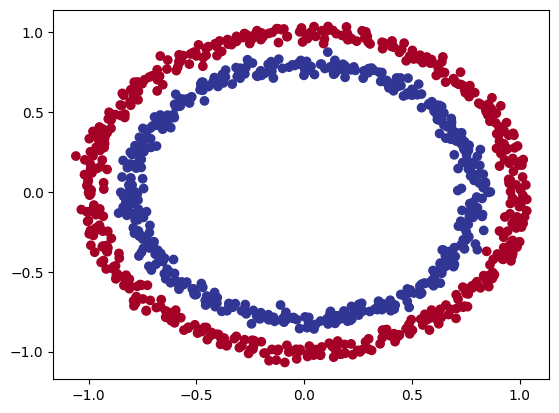

In [6]:
# Visualizing
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);


✅ c=y

* Sets the color of each point based on the values in y.

✔️ If y is:

* Categorical labels (e.g. 0 or 1): Points are colored by class.

* Continuous values: Points are colored by value on a gradient.

✅ cmap=plt.cm.RdYlBu

* cmap is the colormap used to map c values to colors.

* plt.cm.RdYlBu is a red-yellow-blue colormap:

Low values: red

Middle values: yellow

High values: blue



Note: The data we're workig with is often called a toy dataset: which is small enough to experiment but still sizeable enough to pratice the fundamentals.

### 1.1 Check input and output shape

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X_sample1 = X[0]
y_sample1 = y[0]

print(f" Values for 1st sample \n X: {X_sample1} \n y: {y_sample1}")
print(f" Shape of X: {X_sample1.shape} \n Shape of y: {y_sample1.shape}")

 Values for 1st sample 
 X: [0.75424625 0.23148074] 
 y: 1
 Shape of X: (2,) 
 Shape of y: ()


In [9]:
### 1.2 Trun datad into tensor and split data
import torch
X= torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

type(X), type(y), X.dtype, y.dtype



(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [10]:
# Split the Data
# train_split= int(len(X)*0.8) # was used before and split the data manually but we can use scikit
# why so? because previously we had the linear data set but now we have the non linear data set so scikit hepl to select the data randomly

from sklearn.model_selection import train_test_split  # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,      # 20% of the test data i.e 0.2
                                                    random_state=42)    # split the data randomly

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Let's build the model to classify the blue and red dots.

TO do so:
1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [11]:
import torch
from torch import nn
import numpy as np

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [12]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

from ast import Module
Now we've setup device agnostic code, now create the model:

1. Subclass `nn.Module` (almost all model in PyTorch subclass `nn.Module`)
2. Create  2 `nn.linear()` layers that are capable of handaling the shapes o our data.
3. define a `forward()` methos that outlines the forward pass (or forward computation)
4. Instatiate an instance of our model class and send it to the target `device`

In [13]:
# 1. create the model - multilayer

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. Create 2 nn.linear layers capable of handling the shape of our data
    self.layer_1 = nn.Linear(in_features= 2, out_features= 5 )   # genreally in the multiple 8 # takes in 2 features and upscales to 5 features
    self.layer_2 = nn.Linear(in_features= 5, out_features= 1)    # takes in 5 features from previous layer defined and gives us 0ne features similar to y


  # 3. Define the forward method
  def forward(self, x):
    return self.layer_2(self.layer_1(x))  # X -> layer 1 -> layer 2 -> y (output)

# 4. Instantiate an instance of our model class and sent it to the targete device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
next(model_0.parameters()).device

device(type='cpu')

Playground (formerly called **TensorFlow Playground** and **Deep Playground**) is a browser-based application to help you learn about and experiment with neural networks. Use Playground to visualize how changes to hyperparameters influence a machine learning model.

https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.39416&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false

**figma.com**: to create the figure of the model or neural network model.

In [15]:
# Let's replicate the model above using nn.Sequential
# model_0 = nn.Sequential(
#     nn.Linear(in_features=2,
#               out_features=5),
#     nn.Linear(in_features=5,
#               out_features=1)).to(device)

# model_0



In [16]:
model_0.state_dict()  # the weight= 5*2(in*out) and bais = 5(out) for seq(0)
                      # the weight= 5*1(in*out) and bais = 1(out) for seq(1)

OrderedDict([('layer_1.weight',
              tensor([[ 0.6676,  0.5797],
                      [ 0.1819,  0.4983],
                      [ 0.4329,  0.6301],
                      [-0.4883, -0.3103],
                      [-0.2737,  0.2142]])),
             ('layer_1.bias',
              tensor([ 0.1135, -0.0458,  0.6798,  0.5069, -0.6108])),
             ('layer_2.weight',
              tensor([[-0.3550,  0.2294, -0.3918, -0.3149,  0.0023]])),
             ('layer_2.bias', tensor([0.3814]))])

In [17]:
# Make prediction
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
untrained_preds= model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape of predictions: {untrained_preds.shape}")
print(f" length of test smples: {len(X_test)}, Shape of test samples: {X_test.shape}")
print(f"\n First 10 predictions: {untrained_preds[:10]}")
print(f"\n First 10 labels: {y_test[:10]}")


Length of predictions: 200, Shape of predictions: torch.Size([200, 1])
 length of test smples: 200, Shape of test samples: torch.Size([200, 2])

 First 10 predictions: tensor([[-0.1812],
        [-0.3305],
        [ 0.1277],
        [-0.2683],
        [-0.0033],
        [-0.0934],
        [-0.4100],
        [-0.3548],
        [ 0.1328],
        [-0.3419]], grad_fn=<SliceBackward0>)

 First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [18]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

## 2.1 Creating the loss function and optimizeer

Which loss function or optimzer should we use

Again.... this is problem specific

For example for example you might want MAE or MSE (mean absolute error or mean squared error)

For classification you might want binary cross entropy or cross entropy or categorical cross entropy

And for **optimizer**, two o the most common and useful are SGD and Adam, however PyTorch have many option for building function.

###Logit:
A **Logit** is the raw output value (pre-activation) from a neural network layer before applying a sigmoid or softmax activation function.

🔬 Mathematically

* For binary classification:

  Logit is the input to the sigmoid function.

  If the output of your final linear layer is z i.e z=wx+b, then:

                  Sigmoid(𝑧) = 1/1+𝑒^−𝑧

Here, z is called the logit.

* For multi-class classification:

  The vector of outputs before softmax is called logits.

  Softmax converts logits to probabilities that sum to 1.

✅ Why is it called “logit”?
In statistics:

                  logit(𝑝)=log⁡(𝑝/(1−𝑝))

It maps probabilities (0,1) to real numbers (-∞, +∞). The logit function is the inverse of the sigmoid function. It converts a probability (between 0 and 1) back to the real number domain

In neural networks, the reverse happens:

* The model outputs logits (any real number).

* Applying sigmoid maps them to probabilities (0 to 1)



In [19]:
# Creating the loss function and optimizer
# loss_fn = nn.BCELoss # BCELoss=  requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss()            # BCEWithLogitsLoss()= sigmoid activation function built-in
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

## To calculate the accuracy

torch.eq(y_true, y_pred)

This compares each element of y_true and y_pred.

Returns a Boolean tensor with True (if equal) or False (if not equal) element-wise.

### Output: tensor([True, False, True, False])
✔️ .sum()

In PyTorch, Boolean True is treated as 1, False as 0 when using sum.

So it counts the number of correct predictions.

### Output: tensor(2)
✔️ .item()

Converts the single-element tensor result from .sum() into a Python scalar (int).

In [20]:
# Calculate Accuracy (helpful for classification problem):
def accuracy_fn(y_true, y_pred):
  correct= torch.eq(y_true, y_pred).sum().item()
  acc= (correct/len(y_pred))*100
  return acc

## 3. Train model

To train our model:

1. **Forward pass:** `model_0(X_train)`
2. **Calculate the loss:** `loss= loss_fn(y_pred, y_true)`
3. **Zero gradients:** `optimizer.zero_grad()`
4. **Perform backpropagation of the loss:** `loss.backward()`
5. **Step optimizer (gradient descent):** `optimizer.step()`

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw logits (not passed through activation function / linear layers above).

We can convert these **logits** into preediction probabilities by passing them to some activation function (e.g., sigmoid for binary crossentropy and softmax for multiclass classiffication)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the argmax()

In [21]:
# View the first 5 outputs to the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))
y_logits[:5]


tensor([[-0.1812],
        [-0.3305],
        [ 0.1277],
        [-0.2683],
        [-0.0033]])

In [22]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [23]:
# Use the sigmoid activation function on our models logits to turn the into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.4548],
        [0.4181],
        [0.5319],
        [0.4333],
        [0.4992]])

For our prediction probability values, we need to perform a range-style rounding on them:

* `y_pred_probs` >=0.5, `y=1` (class 1)
* `y_pred_probs` <0.5, `y=0` (class 0)

In [24]:
torch.round(y_pred_probs[:5]) # why can't we directly round the raw logits with out sigmoid activation?

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [0.]])

Why is sigmoid necessary here?
* Without sigmoid

Logits have arbitrary scale, cannot interpret them as class probabilities.
* With sigmoid

Outputs are probabilities between 0 and 1, ready for thresholding to predict classes.

In [25]:
# Find the prediction labels
y_preds = torch.round(y_pred_probs)
y_preds[:5]

# In full
y_preds_lables= torch.round(torch.sigmoid(model_0(X_test.to(device))))
y_preds_lables[:5]

# Check for equality
print(torch.eq(y_preds_lables[:5], y_preds[:5])) # need to squeeze here for extra dimension

# Get rid of extra dimension
y_preds[:5].squeeze()

tensor([[True],
        [True],
        [True],
        [True],
        [True]])


tensor([0., 0., 1., 0., 0.])

### 3.2 Building the Train and Test loop


In [26]:
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
  ### Training
  model_0.train()      # inform the training loop is carried out

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))    # turn logits-> pred probs -> pred labels

  # 2. Calculate the loss and accuracy

  # loss = loss_fn(torch.sigmoid(y_logits), y_train) # nn.BCELoss expects prediction probabilities as input

  loss = loss_fn(y_logits,            # nn.BCEwithLogitsLoss ecpect raw logits as input and !!!! the orders matter be careful !!!
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  if epoch % 20 == 0:
      print(f"epochs = {epoch} | loss = {loss} | accuracy = {acc}")

  # Optimize the zero grad
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # Optimizer step (grdient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss and accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)  # scikit define accuracy as y_true firt then y_pred, https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

    # Print out what's happenin'
    if epoch % 20 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")



epochs = 0 | loss = 0.7011106610298157 | accuracy = 47.375
Epoch: 0 | Loss: 0.70111, Accuracy: 47.38% | Test Loss: 0.69298 | Test Acc: 53.50%
epochs = 20 | loss = 0.7001718282699585 | accuracy = 47.875
Epoch: 20 | Loss: 0.70017, Accuracy: 47.88% | Test Loss: 0.69242 | Test Acc: 54.00%
epochs = 40 | loss = 0.699370265007019 | accuracy = 48.125
Epoch: 40 | Loss: 0.69937, Accuracy: 48.12% | Test Loss: 0.69199 | Test Acc: 54.50%
epochs = 60 | loss = 0.6986811757087708 | accuracy = 48.25
Epoch: 60 | Loss: 0.69868, Accuracy: 48.25% | Test Loss: 0.69166 | Test Acc: 54.00%
epochs = 80 | loss = 0.6980847120285034 | accuracy = 48.375
Epoch: 80 | Loss: 0.69808, Accuracy: 48.38% | Test Loss: 0.69141 | Test Acc: 53.50%


## 4. Make predictions and evaluation model

From the metrics it looks loke  our model isnot learning anything......

So to inspect it we will make some predictions and make them visual!!!!

In other words, "Visualize, visualize, visualize!!!!!"

To do so, we're going to import a function  called `plot_decision_boundary()`

In [27]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    # """Plots decision boundaries of model predicting on X in comparison to y.

    #Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



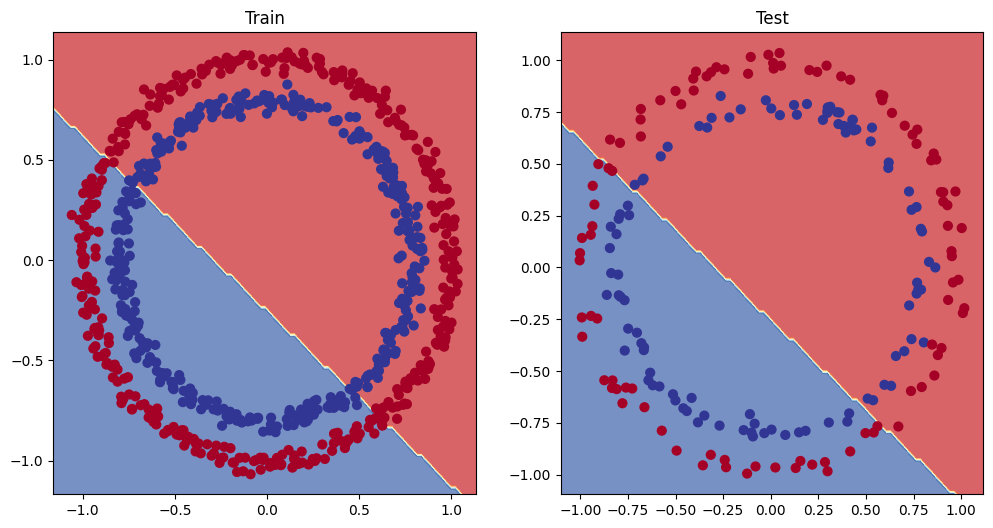

In [28]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

💡 4. Practical approach

✅ Start with ReLU in hidden layers

✅ Use Sigmoid for binary classification output

✅ Use Softmax for multi-class classification output

✅ For regression, output layer is linear (no activation)

If you face learning issues, try switching to Leaky ReLU or ELU in hidden layers. In some special architectures (e.g. LSTM, GRU), Sigmoid and Tanh are used internally due to gating mechanisms.

| Activation     | When to use                                                     | Properties                                                           |
| -------------- | --------------------------------------------------------------- | -------------------------------------------------------------------- |
| **ReLU**       | Default choice for hidden layers in most networks               | Fast convergence, prevents vanishing gradient (mostly)               |
| **Leaky ReLU** | If you face "dying ReLU problem" (many neurons outputting zero) | Allows a small negative slope                                        |
| **Sigmoid**    | Rarely used in hidden layers now                                | Causes vanishing gradients; used in output for binary classification |
| **Tanh**       | If you want outputs between -1 and 1                            | Better than Sigmoid as it’s zero-centered                            |
| **Softmax**    | Only in output layer for multi-class classification             | Converts logits to probabilities                                     |


Our model didn't work because we only given the power to use linear lines/straight line.

But we can witness that our data in circular/curved. Although our curve is simple, we need non linearity to model this dataset.

### 6.1 The missing piece: non-linearity

"What patterns could we draw if we were given an infinite amount of straight and non-straight lines?"

Or in machine learning terms, an infinite(but really is finite) of linear and non-linear functions?

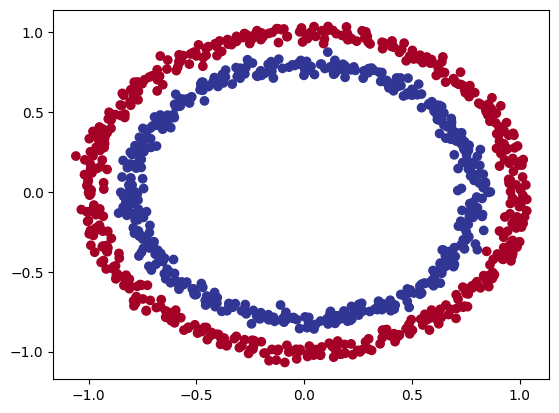

In [29]:
### 6.1 Recreating non-lineaar data (red and blue circles)

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)


In [30]:
# Convert data to tensors and then to train and test split
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state= 42)
X_train[:5], y_train[:5], X_test[:5], y_test[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]]),
 tensor([1., 0., 1., 0., 1.]))

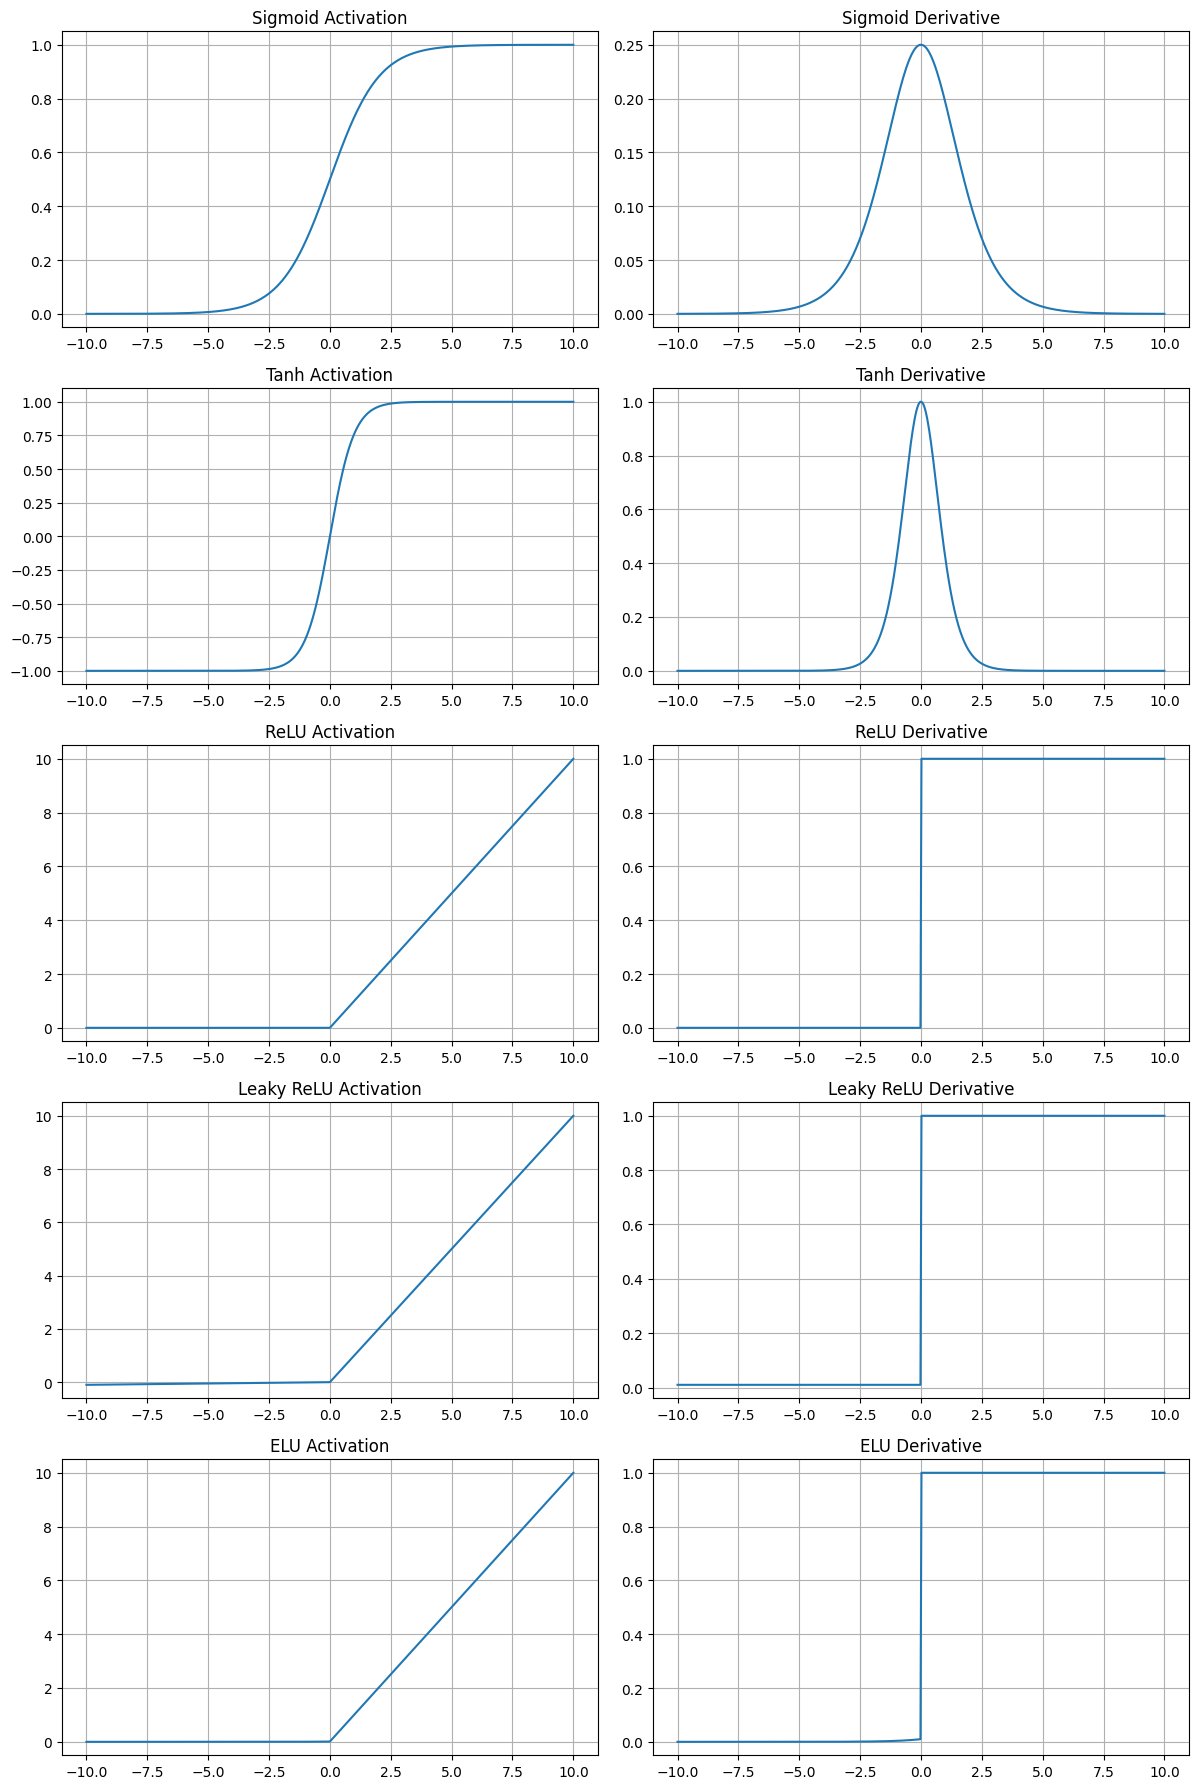

In [31]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 500)

# Sigmoid
sigmoid = 1 / (1 + np.exp(-x))
sigmoid_derivative = sigmoid * (1 - sigmoid)

# Tanh
tanh = np.tanh(x)
tanh_derivative = 1 - tanh**2

# ReLU
relu = np.maximum(0, x)
relu_derivative = np.where(x > 0, 1, 0)

# Leaky ReLU
alpha = 0.01
leaky_relu = np.where(x > 0, x, alpha * x)
leaky_relu_derivative = np.where(x > 0, 1, alpha)

# ELU
elu = np.where(x > 0, x, alpha * (np.exp(x) - 1))
elu_derivative = np.where(x > 0, 1, elu + alpha)

# Plotting
plt.figure(figsize=(12, 18))

# Sigmoid
plt.subplot(5, 2, 1)
plt.plot(x, sigmoid)
plt.title("Sigmoid Activation")
plt.grid()

plt.subplot(5, 2, 2)
plt.plot(x, sigmoid_derivative)
plt.title("Sigmoid Derivative")
plt.grid()

# Tanh
plt.subplot(5, 2, 3)
plt.plot(x, tanh)
plt.title("Tanh Activation")
plt.grid()

plt.subplot(5, 2, 4)
plt.plot(x, tanh_derivative)
plt.title("Tanh Derivative")
plt.grid()

# ReLU
plt.subplot(5, 2, 5)
plt.plot(x, relu)
plt.title("ReLU Activation")
plt.grid()

plt.subplot(5, 2, 6)
plt.plot(x, relu_derivative)
plt.title("ReLU Derivative")
plt.grid()

# Leaky ReLU
plt.subplot(5, 2, 7)
plt.plot(x, leaky_relu)
plt.title("Leaky ReLU Activation")
plt.grid()

plt.subplot(5, 2, 8)
plt.plot(x, leaky_relu_derivative)
plt.title("Leaky ReLU Derivative")
plt.grid()

# ELU
plt.subplot(5, 2, 9)
plt.plot(x, elu)
plt.title("ELU Activation")
plt.grid()

plt.subplot(5, 2, 10)
plt.plot(x, elu_derivative)
plt.title("ELU Derivative")
plt.grid()

plt.tight_layout()
plt.show()


### 6.2 Building the model with non-linearity

* Artificial neural network (ANN) are the large combination of linear(straight line) and non-linear(non-straight)function which are poteential to able to pattters in data.


In [32]:
# Build a model with non-linear activation function
from torch import nn
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=8)
    self.layer_2 = nn.Linear(in_features=8, out_features=8)
    self.layer_3 = nn.Linear(in_features=8, out_features=1)
    self.relu = nn.ReLU()  # relu is a non-linear activation function, which converts the negative number to zero and non-negative to as it is.

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_nl= CircleModelV1().to(device)
model_nl

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=8, bias=True)
  (layer_2): Linear(in_features=8, out_features=8, bias=True)
  (layer_3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)

In [33]:
# define loss function and optimizer

loss_fn= nn.BCEWithLogitsLoss()
optimizer= torch.optim.SGD(params=model_nl.parameters(),
                           lr=0.1)


### 6.3 Training a model with non-linearity

In [34]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data in traget device
X_test, y_test = X_test.to(device), y_test.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)

# Commencement of the loop
epochs=2000
for epoch in range(epochs):
  # Start training
  model_nl.train()

  # Forward pass
  y_logits = model_nl(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # Loss and accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_train, y_pred)

  # optimizer zero grad
  optimizer.zero_grad()

  # backward propagation
  loss.backward()

  # optimizer step
  optimizer.step()

  # Make prediction
  model_nl.eval()
  with torch.inference_mode():
    test_logits = model_nl(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss= loss_fn(test_logits, y_test)
    test_acc= accuracy_fn(y_test, test_pred)

    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69363, Accuracy: 50.00% | Test Loss: 0.69269 | Test Acc: 50.00%
Epoch: 100 | Loss: 0.68831, Accuracy: 54.25% | Test Loss: 0.68911 | Test Acc: 52.00%
Epoch: 200 | Loss: 0.68498, Accuracy: 55.75% | Test Loss: 0.68705 | Test Acc: 55.50%
Epoch: 300 | Loss: 0.68043, Accuracy: 57.75% | Test Loss: 0.68379 | Test Acc: 56.50%
Epoch: 400 | Loss: 0.67346, Accuracy: 64.50% | Test Loss: 0.67800 | Test Acc: 66.00%
Epoch: 500 | Loss: 0.66064, Accuracy: 71.12% | Test Loss: 0.66654 | Test Acc: 72.00%
Epoch: 600 | Loss: 0.63654, Accuracy: 80.25% | Test Loss: 0.64634 | Test Acc: 81.00%
Epoch: 700 | Loss: 0.59190, Accuracy: 92.12% | Test Loss: 0.61028 | Test Acc: 88.50%
Epoch: 800 | Loss: 0.51509, Accuracy: 95.00% | Test Loss: 0.54712 | Test Acc: 88.00%
Epoch: 900 | Loss: 0.40388, Accuracy: 97.75% | Test Loss: 0.44814 | Test Acc: 94.50%
Epoch: 1000 | Loss: 0.27827, Accuracy: 99.62% | Test Loss: 0.32705 | Test Acc: 98.00%
Epoch: 1100 | Loss: 0.18070, Accuracy: 99.88% | Test Loss: 0.22842

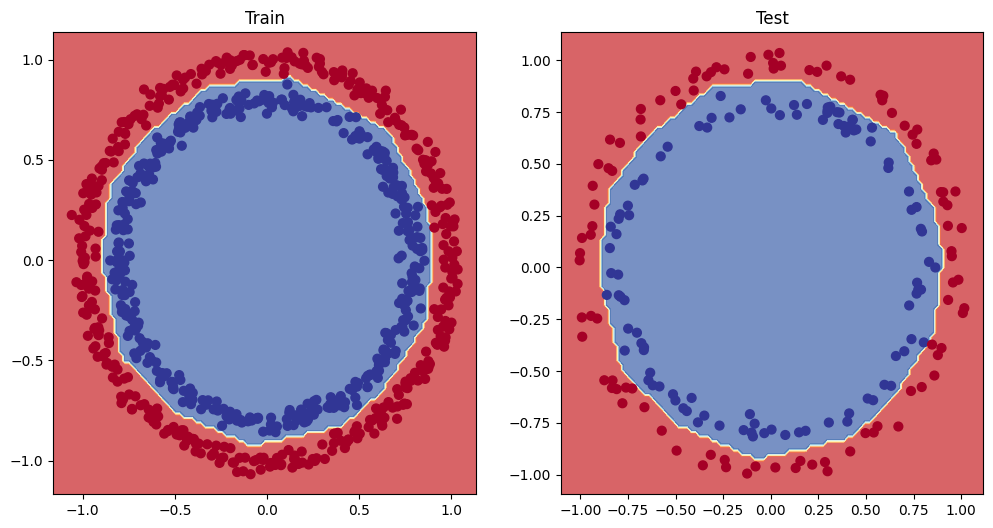

In [35]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)   ## for plotting the figure number of figures in 1 row, 2 column and again 1 is the index of the required plot
plt.title("Train")
plot_decision_boundary(model_nl, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_nl, X_test, y_test)

## 7. Replicating non-linear activation functions

NN, rather than telling the model what to learn, we give tool to discover patterns in data and tries to figure out the patterns on its own.

And these tool are linear and non-linear function

In [36]:
# Creating a tensor
A= torch.arange (-10,10, 1, dtype= torch.float32)
A.dtype


torch.float32

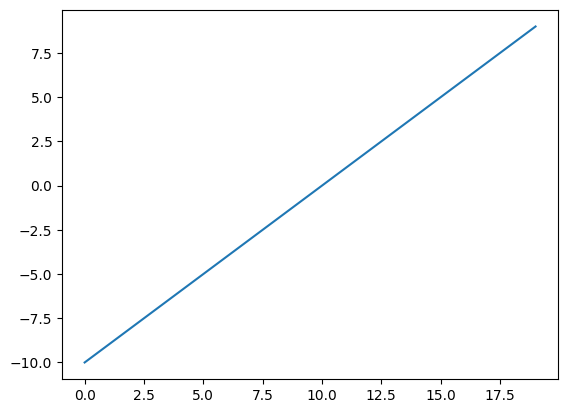

In [37]:
# Visualizing the tensor:
plt.plot(A)

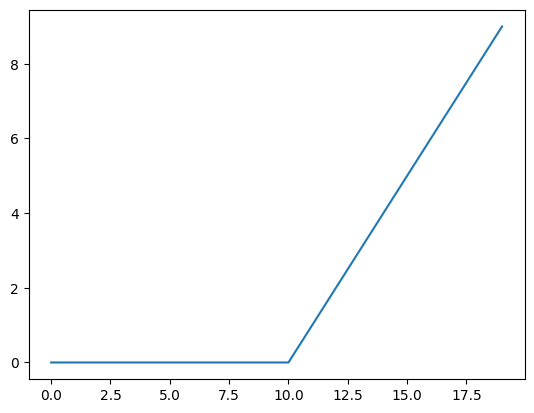

In [38]:
plt.plot(torch.relu(A))

In [39]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

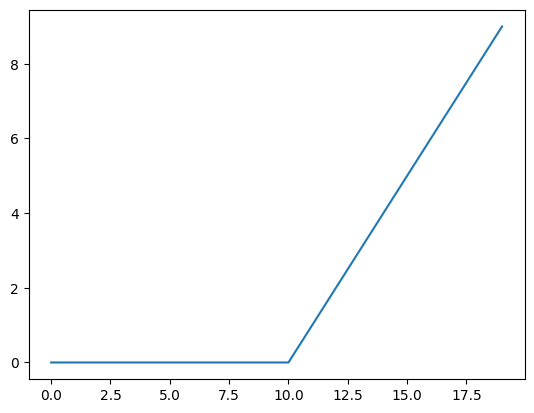

In [40]:
## Defining the relu function by our own: useful in future use

def reluu(x: torch.Tensor):
  return torch.max(torch.tensor(0), x) # input must be tensor so, torch.tensor(0)

plt.plot(reluu(A))



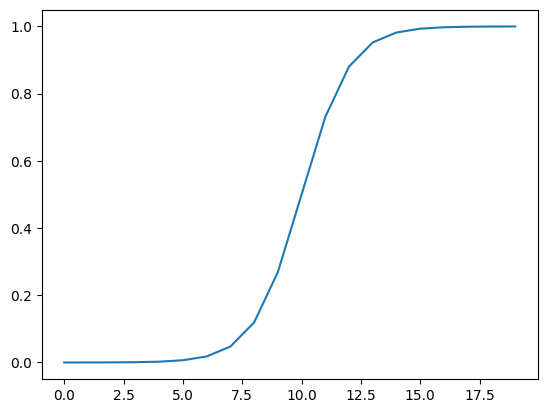

In [41]:
# Defining the sigmoid function

def sigmoidd(x: torch.Tensor):
  return (1/(1 + torch.exp(-x)))

plt.plot(sigmoidd(A))

## 8. Putting it all together with multi-class classification problem

* Binary classification = 2 classes (eg: head/tail or spam/not, etc)
* Multi-class classification = more than 2 classes

| **Aspect**                                             | **Binary Classification**                                                | **Multi-class Classification**                                 |
| ------------------------------------------------------ | ------------------------------------------------------------------------ | -------------------------------------------------------------- |
| **Input Layer**                                        | Depends on input features (e.g. number of input variables)               | Same                                                           |
| **Hidden Layers**                                      | ≥1 hidden layer(s) as per model design                        | Same                                                           |
| **Neurons per Hidden Layer**                           | User-defined (e.g. 64, 128, etc.)                                        | Same                                                           |
| **Hidden Layer Activation**                            | ReLU / Leaky ReLU (commonly used)                                        | ReLU / Leaky ReLU (commonly used)                              |
| **Output Layer Shape (out\_features)**                 | 1 neuron                                                                 | Number of classes neurons                                      |
| **Output Activation**                                  | Sigmoid (or none if using BCEWithLogitsLoss)                             | None if using CrossEntropyLoss (Softmax applied internally)    |
| **Loss Function**                                      | BCELoss (if Sigmoid in model) or <br>BCEWithLogitsLoss (no Sigmoid in model) | CrossEntropyLoss                                               |
| **Target Label Shape**                                 | (batch\_size, 1)                                                         | (batch\_size,)                                                 |
| **Target Label Type**                                  | FloatTensor with values 0.0 or 1.0                                       | LongTensor with class indices (0,1,2,...)                      |
| **Output Shape**                                       | (batch\_size, 1)                                                         | (batch\_size, num\_classes)                                    |
| **Predicted Output**                                   | Probability between 0 and 1                                              | Class logits (Softmax probabilities if applied for prediction) |
| **Optimizer**                                          | Adam / SGD (depends on experiment)                                       | Adam / SGD (depends on experiment)                             |
| **Evaluation Metric**                                  | Accuracy, Precision, Recall, F1, ROC-AUC                                 | Accuracy, per-class Precision, Recall, F1, Confusion Matrix    |
| **Final Activation at Inference (for interpretation)** | Sigmoid to get probabilities                                             | Softmax to get class probabilities                             |


### 8.1 Creating a toy multi-class datasets

In [42]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs     ### this for toy dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.model_selection import train_test_split


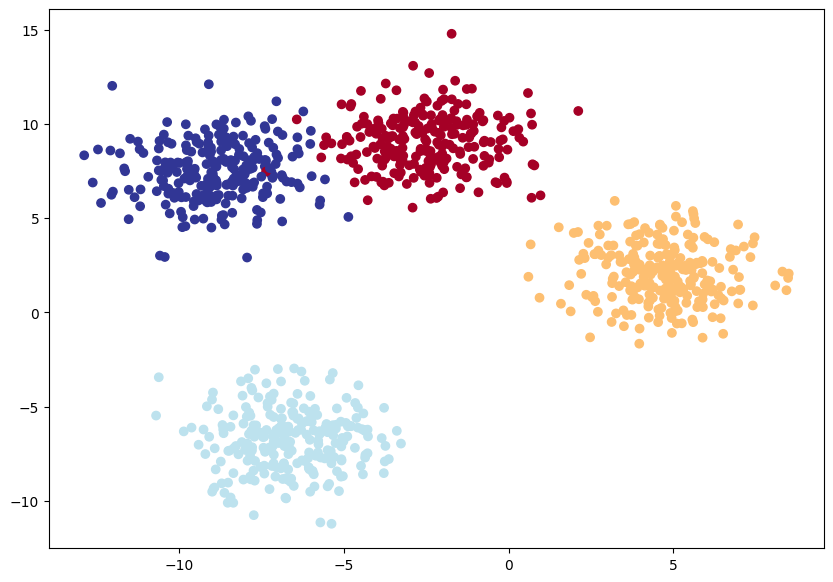

In [43]:
# Set the hyperparamter for data creation
Num_Classes = 4
Num_Features = 2
Random_Seed= 42

# 1. Create multi-class data
from sklearn.datasets import make_blobs     ### this for toy dataset: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=Num_Features,
                            centers=Num_Classes,
                            cluster_std=1.5,
                            random_state=Random_Seed)

# 2. Trun data into tesnsors
X_blob = torch.tensor(X_blob).type(torch.float32)
y_blob = torch.tensor(y_blob).type(torch.long)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=Random_Seed,
                                                                         )

# Visualization (data ploting)
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Building a multi-class classsification model

In [44]:
# Creating Device agnotic code
device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [45]:
# Build the model

class Blob_Model(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):

    """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """

    super().__init__()
    self.Linear_layer_stack= nn.Sequential(
        nn.Linear(in_features=Num_Features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=Num_Classes)
    )

  def forward(self, x: torch.Tensor):
    return self.Linear_layer_stack(x)



In [46]:
X_blob_train.shape, y_blob_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [47]:
torch.unique(y_blob_train), y_blob_train.dtype

(tensor([0, 1, 2, 3]), torch.int64)

In [48]:
# CReating the model and send to target device

model_blob= Blob_Model(input_features=2,
                       output_features=4,
                       hidden_units=16).to(device) # writing the model in general lead to the funtionligation

model_blob

Blob_Model(
  (Linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=4, bias=True)
  )
)

### 8.3 Creating the loss function and optimizer

In [49]:
# Creating the loss function
loss_fn= torch.nn.CrossEntropyLoss()

# creating the optimizer function
optimizer= torch.optim.SGD(params=model_blob.parameters(),
                           lr=0.1)


### 8.4 Getting prediction probabilities for multi-class PyTorch model

In order to evaluate and train and tet our model, we need to convert our model's outputs(logits) to probabilities and then to the prediction labels.

logits (raw output of the model) -> Pred probs (use `torch.sotmax`) -> Pred labels ( take the **torch.argmax()** of the prediction probabilities

In [50]:
model_blob.eval()
with torch.inference_mode():
  y_logits= model_blob(X_blob_train.to(device)).squeeze()
  y_pred= torch.softmax(y_logits, dim=1)    # using the activation function
y_logits, y_pred

(tensor([[-0.5290,  0.0797,  0.5474, -0.3397],
         [-0.2099, -0.0837, -0.5981, -0.1755],
         [-0.5065, -0.3383, -0.9062, -0.4618],
         ...,
         [-0.2847, -0.1058, -0.4840, -0.0879],
         [-0.4276, -0.2325, -0.7727, -0.4054],
         [-0.2722, -0.3591, -0.6389, -0.9072]]),
 tensor([[0.1433, 0.2633, 0.4203, 0.1731],
         [0.2599, 0.2948, 0.1763, 0.2690],
         [0.2565, 0.3034, 0.1720, 0.2682],
         ...,
         [0.2363, 0.2825, 0.1936, 0.2876],
         [0.2534, 0.3080, 0.1795, 0.2591],
         [0.3185, 0.2920, 0.2207, 0.1688]]))

In [51]:
print(torch.sum(y_pred[0]))
print(torch.max(y_pred[0]))
# Convert our model's prediction into the required or desired output (i.e 0,1,2,3)
torch.argmax(y_pred[0])

tensor(1.)
tensor(0.4203)


tensor(2)

In [52]:
# Converting our model's prediction probabilities to prediction lables
y_preds_labless= torch.argmax(y_pred, dim=1)
print(y_preds_labless[:15]) # to look if our output matches the required output layer of the training data
y_blob_train[:15]

tensor([2, 1, 1, 1, 1, 3, 1, 2, 0, 1, 3, 1, 0, 1, 0])


tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0, 0, 0, 3, 2, 3])

### 8.5 Creating a training and testing loop for the multi-class PyTorch model

In [53]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Putting the data into targeted device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

epochs=100

# Starting the training loop
for epoch in range(epochs):
  # setting the loop into training mode
  model_blob.train()

  # Forward propagation/pass
  y_logits= model_blob(X_blob_train).squeeze()
  y_pred= torch.softmax(y_logits, dim=1)
  y_preds_labels= torch.argmax(y_pred, dim=1)

  # Loss and accuracy
  loss= loss_fn(y_pred, y_blob_train)
  acc= accuracy_fn(y_blob_train, y_preds_labels)

  # optimizer zero grad
  optimizer.zero_grad()

  # backward propagation
  loss.backward()

  # optimizer step
  optimizer.step()

  # setting the loop into testing mode
  model_blob.eval()
  with torch.inference_mode():
    test_logits= model_blob(X_blob_test).squeeze()
    test_pred= torch.softmax(test_logits, dim=1)
    test_pred_labels= torch.argmax(test_pred, dim=1)

    test_loss= loss_fn(test_pred, y_blob_test)
    test_acc= accuracy_fn(y_blob_test, test_pred_labels)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.41554, Accuracy: 3.38% | Test Loss: 1.40638 | Test Acc: 10.50%
Epoch: 10 | Loss: 1.23428, Accuracy: 74.75% | Test Loss: 1.21158 | Test Acc: 75.00%
Epoch: 20 | Loss: 1.02532, Accuracy: 78.50% | Test Loss: 1.00607 | Test Acc: 80.50%
Epoch: 30 | Loss: 0.90552, Accuracy: 98.50% | Test Loss: 0.89852 | Test Acc: 100.00%
Epoch: 40 | Loss: 0.83617, Accuracy: 99.12% | Test Loss: 0.83226 | Test Acc: 99.50%
Epoch: 50 | Loss: 0.80421, Accuracy: 99.00% | Test Loss: 0.80099 | Test Acc: 99.50%
Epoch: 60 | Loss: 0.78921, Accuracy: 99.00% | Test Loss: 0.78603 | Test Acc: 99.50%
Epoch: 70 | Loss: 0.78088, Accuracy: 99.00% | Test Loss: 0.77765 | Test Acc: 99.50%
Epoch: 80 | Loss: 0.77564, Accuracy: 99.00% | Test Loss: 0.77238 | Test Acc: 99.50%
Epoch: 90 | Loss: 0.77206, Accuracy: 99.00% | Test Loss: 0.76877 | Test Acc: 99.50%


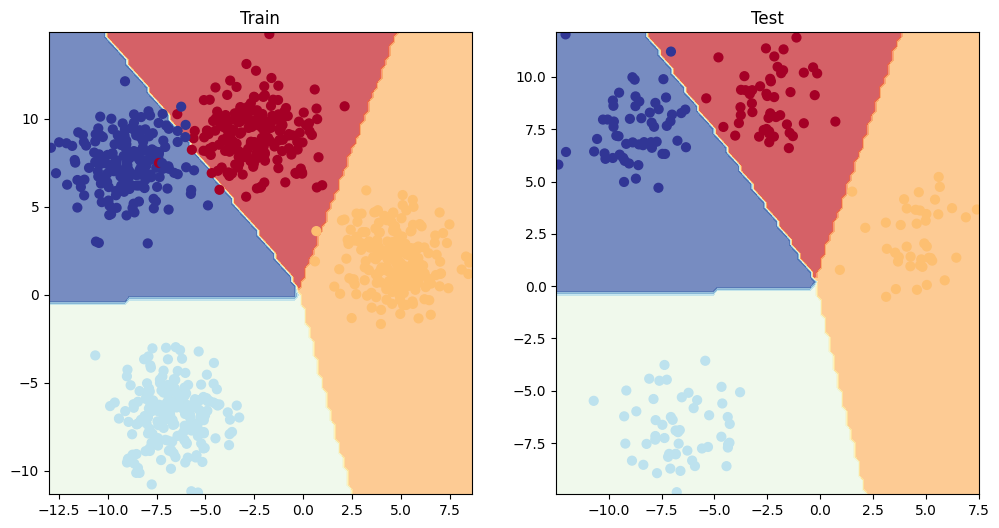

In [54]:
### Visualizing the data

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_blob, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_blob, X_blob_test, y_blob_test)

## 9. More classification evaluation metrics

We've only covered a couple of ways of evaluating a classification model (accuracy, loss and visualizing predictions).

These are some of the most common methods you'll come across and are a good starting point.

However, you may want to evaluate your classification model using more metrics such as the following:

| **Metric name / Evaluation method** | **Definition**                                                                                                                                                              | **Code**                                                                      |
| ----------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------- |
| **Accuracy**                        | Out of 100 predictions, how many does your model get correct? <br>E.g. 95% accuracy means it gets 95/100 predictions correct.                                                   | `torchmetrics.Accuracy()`<br>`sklearn.metrics.accuracy_score()`               |
| **Precision**                       | Proportion of true positives over total number of predicted positives. <br> Higher precision means less false positives (model predicts 1 when it should've been 0).             | `torchmetrics.Precision()`<br>`sklearn.metrics.precision_score()`             |
| **Recall**                          | Proportion of true positives over total number of true positives and false negatives. <br> Higher recall means less false negatives (model predicts 0 when it should've been 1). | `torchmetrics.Recall()`<br>`sklearn.metrics.recall_score()`                   |
| **F1-score**                        | Combines precision and recall into one metric. 1 is best, 0 is worst.                                                                                                       | `torchmetrics.F1Score()`<br>`sklearn.metrics.f1_score()`                      |
| **Confusion matrix**                | Compares the predicted values with the true values in a tabular way. <br>If 100% correct, all values in the matrix will be on the diagonal line.                                | `torchmetrics.ConfusionMatrix()`<br>`sklearn.metrics.plot_confusion_matrix()` |
| **Classification report**           | Collection of main classification metrics such as precision, recall, and f1-score.                                                                                          | `sklearn.metrics.classification_report()`                                     |


In [ ]:
!pip install torchmetrics

In [61]:
import torchmetrics

# Setup metric and make sure it's on the target device
from torchmetrics import Accuracy
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_blob_test, test_pred_labels)

tensor(0.9950)

We can see that the accuracy function we have created and the accuracy function defined by torchmetrics_accuracy are the same. OK!!
